In [134]:
import sys
main_path = "../.."
sys.path.append(main_path)

import numpy as np
import pandas as pd
from impyute.imputation.cs import fast_knn
import os
import yaml
import copy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from src.scripts.model_and_evaluation import ModelAndEvaluation
from src.scripts.extra_features_model_and_evaluation import ExtraFeaturesModelAndEvaluation
import seaborn as sns
from src.scripts.common_figures import Figures


In [135]:
figures = Figures()
sns.set_context('poster', font_scale=0.8)

In [136]:
model_and_evaluation = ModelAndEvaluation()
extra_features_model_and_evaluation = ExtraFeaturesModelAndEvaluation()

In [137]:
df_path = f"{main_path}/data/processed/dataframes"

data = pd.read_excel('../../data/raw/lung_cancer.xlsx')

data = data.iloc[:][3:len(data)]

data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
level_of_cancer = np.ravel(data.iloc[:, 23])
level_of_cancer = np.where(level_of_cancer == 'T2', 2,
                                  np.where(level_of_cancer == 'T3', 3,
                                           np.where(level_of_cancer == 'T4', 4, 1)))


# data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
data = data.iloc[:,5:22]
columns = data.columns[2:17]
print(columns)



Index(['IDO-1', 'p16540', 'p16580', 'FOXP3', 'ICAM-1', 'GALECTİN-3', 'CD28',
       'GALECTİN-3.1', 'CD27', 'PD1/pdcd1PDL1/cd274', 'PDL1', 'CD40', 'TIM1',
       'CTLA-4', 'MDM2'],
      dtype='object')


In [138]:
cdt_di_fi = pd.read_csv(f"{df_path}/cdt_di_fi.csv")[0:70]
print(cdt_di_fi)

    IDO-1  p16540  p16580  FOXP3  ICAM-1  GALECTİN-3  CD28  GALECTİN-3.1   
0      10      10      10     10       5           2     5             8  \
1      10      10      10     10       5          10     5             0   
2      14      11      10      0       6           0     5            10   
3      10      10      10      0       6           2     9            10   
4      14      10      10      8       6           4     5             6   
..    ...     ...     ...    ...     ...         ...   ...           ...   
65     15      10      10     10      15           2    10             8   
66     15      10       9      0       5           5     5             6   
67     14      10      10      8       6           5     5             6   
68     10      10      10     10       5           0     5            10   
69     15      10      10     10       6           2     9             8   

    CD27  PD1/pdcd1PDL1/cd274  PDL1  CD40  TIM1  CTLA-4  MDM2  
0      5               

In [139]:
kmeans = KMeans(n_clusters=4)  # 4 küme için ayarlandı, isteğe bağlı olarak değiştirilebilir
kmeans.fit(cdt_di_fi)

# Küme etiketlerini alın
kume_etiketleri = kmeans.labels_

# Her bir veri noktası için akciğer kanseri seviyesini ilişkilendirin
kumeleme_sonuclari = pd.DataFrame({'kanser_seviyesi': level_of_cancer, 'kume_etiketi': kume_etiketleri})

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Kümeleme sonuçları ve gerçek etiketlerinizi alın
predicted_labels = kume_etiketleri.reshape(-1, 1)
true_labels = level_of_cancer.reshape(-1, 1)
print(predicted_labels, true_labels)

# Silhouette skoru
silhouette = silhouette_score(predicted_labels, true_labels)
print("Silhouette Score:", silhouette)

# Calinski-Harabasz skoru
ch_score = calinski_harabasz_score(predicted_labels, true_labels)
print("Calinski-Harabasz Score:", ch_score)

# Davies-Bouldin skoru
db_score = davies_bouldin_score(predicted_labels, true_labels)
print("Davies-Bouldin Score:", db_score)


[[0]
 [1]
 [2]
 [2]
 [0]
 [3]
 [3]
 [3]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [3]
 [0]
 [0]
 [3]
 [1]
 [3]
 [2]
 [0]
 [1]
 [0]
 [0]
 [3]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [3]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [3]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [3]
 [1]
 [0]
 [1]
 [0]
 [1]
 [3]
 [0]
 [3]
 [2]
 [0]
 [0]
 [0]] [[2]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [4]
 [3]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [4]
 [2]
 [1]
 [2]
 [3]
 [1]
 [2]
 [1]
 [2]
 [2]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [4]
 [2]
 [1]
 [2]
 [3]
 [1]]
Silhouette Score: -0.33092857593630204
Calinski-Harabasz Score: 1.7201068045847427
Davies-Bouldin Score: 6.679368607185861


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataCon

[[-1.98275485 -0.09130803]
 [ 7.3917637   1.5288078 ]
 [-8.49749062 -2.49651394]
 [-6.64379473 -1.5149347 ]
 [-0.81094264 -0.24876017]
 [ 1.92828461 10.34419534]
 [-8.831394    6.72118817]
 [-1.79943038  8.56700588]
 [ 9.38058157 -2.56406675]
 [ 7.86846378  2.0522193 ]
 [-6.60005302 -5.89496592]
 [-0.2161004   0.58702737]
 [-2.6971957  -1.50067941]
 [-2.24103156 -1.60101663]
 [ 4.22677482  1.68233014]
 [-0.34200972  8.85112161]
 [ 1.586384   -8.27794408]
 [-1.11336442 -0.79741514]
 [-6.007909    7.81581373]
 [10.02846658 -1.95635771]
 [ 4.79496576 10.60954782]
 [-4.24882164 -3.02382577]
 [ 0.13880517  1.08437055]
 [ 7.17968059  1.3081741 ]
 [-2.58513228 -0.5433367 ]
 [ 0.96530626  1.35380579]
 [-9.11539462  5.72258676]
 [ 8.04777941  1.25757399]
 [ 7.6547366   1.9496891 ]
 [ 5.02519369  0.56250581]
 [-0.8772863  -8.70975612]
 [ 8.45398748  1.0248851 ]
 [ 4.34709884  1.60157161]
 [ 0.71057308 -3.84486338]
 [ 9.78426891 -2.15280106]
 [-2.67252185 -0.70646787]
 [-5.23904545  7.61186546]
 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


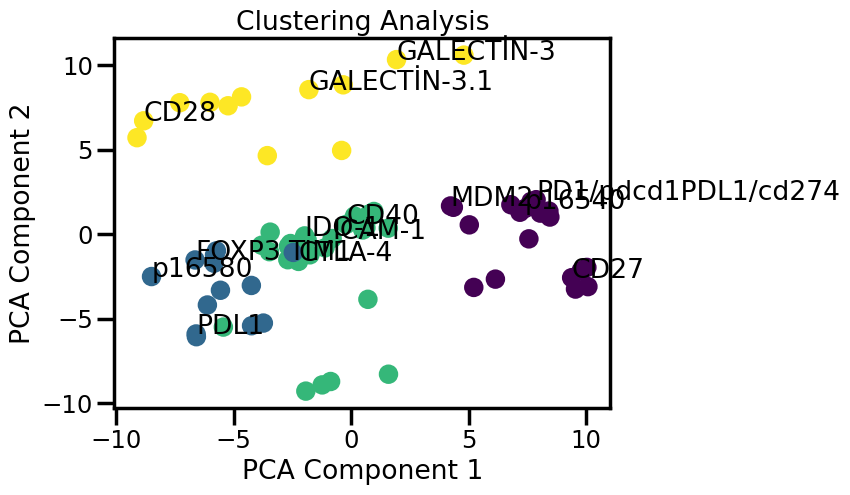

In [140]:
from sklearn.decomposition import PCA

# Gen verilerini yükleyin

# Gen verilerinden sadece sayısal değerleri alın
X = cdt_di_fi

# Kümeleme modelini oluşturun
kmeans = KMeans(n_clusters=4)  # Küme sayısını belirleyin

# Kümeleme modelini eğitin
kmeans.fit(X)

# Küme tahminlerini alın
labels = kmeans.labels_

# Boyut indirgeme için PCA kullanın
pca = PCA(n_components=2)  # İki boyuta indirgeyin
X_pca = pca.fit_transform(X)
print(X_pca)
# Kümeleme sonuçlarını ve görselleştirmeyi çizin
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Analysis')

for i, txt in enumerate(columns):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))


plt.show()


In [141]:
metrics_score_cdt_di_fi_level_of_cancer = extra_features_model_and_evaluation.regression_model(cdt_di_fi.values, level_of_cancer)
print(metrics_score_cdt_di_fi_level_of_cancer)

[2 3 1 1 1 1 2] 
 [1 1 2 2 1 1 1]
[1 1 2 1 2 1 3] 
 [1 1 1 1 1 2 3]
[3 1 2 1 1 1 2] 
 [1 2 1 3 1 1 3]
[1 3 2 1 1 2 1] 
 [3 1 3 2 1 1 1]
[3 2 2 1 1 1 1] 
 [1 1 2 3 1 1 1]
[1 2 3 1 1 2 1] 
 [1 3 1 3 1 2 1]
[1 1 1 2 3 1 2] 
 [1 1 1 1 3 1 2]
[1 1 2 4 1 3 2] 
 [1 3 3 1 1 2 1]
[3 1 4 1 2 1 3] 
 [2 2 3 1 2 1 1]
[1 1 1 2 3 3 4] 
 [2 1 2 2 1 2 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


[2 3 1 1 1 1 2] 
 [1 1 3 2 1 1 1]
[1 1 2 1 2 1 3] 
 [1 1 1 1 1 2 1]
[3 1 2 1 1 1 2] 
 [2 2 3 1 1 1 1]
[1 3 2 1 1 2 1] 
 [1 1 3 3 1 2 1]
[3 2 2 1 1 1 1] 
 [1 1 3 1 1 1 1]
[1 2 3 1 1 2 1] 
 [1 1 1 3 1 2 1]
[1 1 1 2 3 1 2] 
 [1 1 1 1 1 1 2]
[1 1 2 4 1 3 2] 
 [1 1 2 1 1 2 1]
[3 1 4 1 2 1 3] 
 [1 2 1 1 2 1 1]
[1 1 1 2 3 3 4] 
 [2 1 1 1 2 2 2]
[2 3 1 1 1 1 2] 
 [1 1 2 1 1 1 1]
[1 1 2 1 2 1 3] 
 [1 1 1 1 1 1 1]
[3 1 2 1 1 1 2] 
 [1 2 1 1 1 1 1]
[1 3 2 1 1 2 1] 
 [1 1 1 2 1 1 1]
[3 2 2 1 1 1 1] 
 [1 1 2 1 1 1 1]
[1 2 3 1 1 2 1] 
 [1 1 1 3 1 1 1]
[1 1 1 2 3 1 2] 
 [1 1 1 1 1 1 1]
[1 1 2 4 1 3 2] 
 [1 1 1 1 1 1 1]
[3 1 4 1 2 1 3] 
 [1 2 1 1 2 1 1]
[1 1 1 2 3 3 4] 
 [1 1 1 1 1 1 1]
{'lr': {'f1': [0.253968253968254, 0.5238095238095237, 0.2857142857142857, 0.2857142857142857, 0.5714285714285713, 0.619047619047619, 0.8412698412698413, 0.2448979591836735, 0.35714285714285715, 0.19999999999999998]}, 'rf': {'f1': [0.253968253968254, 0.34285714285714286, 0.42857142857142855, 0.619047619047619, 0.4571428

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


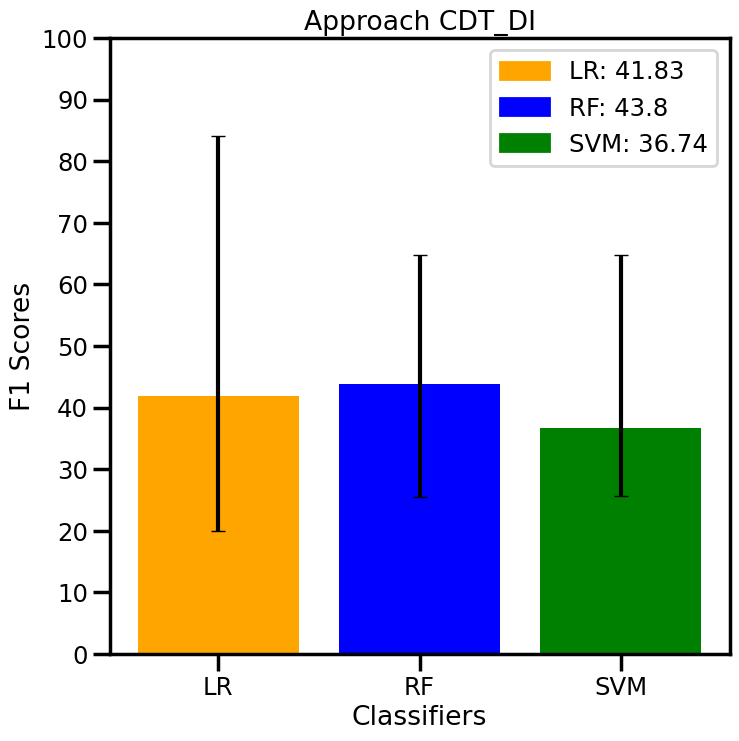

In [142]:
class_names = {'cdt_di_fi':'Approach CDT_DI'}

classifier_names = ['LR', 'RF', 'SVM']

scores = { 'cdt_di_fi':[metrics_score_cdt_di_fi_level_of_cancer[i.lower()]['f1'] for i in classifier_names]}

save = f"{main_path}/figures/paper_figures/png/f1scores_cdt_di_fi_level_of_cancer.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/f1scores_cdt_di_fi_level_of_cancer.svg"
figures.draw_bar_plot(classifier_names, scores, class_names, grid_shape=(1, 1), save=save, paper_figure=paper_figure)
